# Python-1, лекция 10

**Лектор:** Петров Тимур

Сегодня мы начнем с некоторого must-have для аналитики/machine learning и еще много чего: numpy!



![](https://i.pinimg.com/originals/77/18/b2/7718b2f6c858e331b76d6d0b8b01309b.gif)

## Numpy

### Что это такое?

Что такое Numpy? Это библиотека, которая позволяет достаточно быстро выполнять различные операции с массивами (многомерными и не очень): перемножение, сложение, преобразования, базовый анализ данных

Вся работа в массивами в Numpy гораздо проще и быстрее, чем с обычными списками в Python. Давайте проверим это на простом примере

Достаточно часто в линале вам надо было перемножать матрицы, при этом внутри Python нет встроенного перемножения матриц. Без прочих оптимизаций типа алгоритма Штрассена и так далее, давайте попробуем перемножить две матрицы в чистом Python и с помощью numpy и сравним время

In [1]:
import numpy as np

In [ ]:
a = [[i for i in range(50)] for j in range(50)] #возьмем матрицу a размера 50x50
b = [[i for i in range(100)] for j in range(50)] #возьмем матрицу b размера 50x100

In [ ]:
## Pure Python
def matmul_python(a,b):
    return [[sum(ele_a*ele_b for ele_a, ele_b in zip(row_a, col_b))
             for col_b in list(zip(*b))] for row_a in a]

In [ ]:
#Numpy (сделаем функцию, чтобы было честнее)
def matmul_numpy(a, b):
    return np.matrix(a) * np.matrix(b)

In [ ]:
%%time
k_python = matmul_python(a, b)

CPU times: user 37 ms, sys: 782 µs, total: 37.8 ms
Wall time: 41.4 ms


In [ ]:
%%time
k_numpy = matmul_numpy(a, b)

CPU times: user 1.85 ms, sys: 0 ns, total: 1.85 ms
Wall time: 1.86 ms


In [ ]:
np.alltrue(k_python == k_numpy) #проверяем, что таблицы совпадают

True

Удивительно, Numpy почти в 30 раз быстрее, чем Python! За счет чего это получается?

Причин несколько:

* В первую очередь за счет ограничения со стороны размера: если в Numpy при создании объекта он имеет фиксированный размер (и если его надо поменять, то создастся новый объект и старый будет удален), то в Python нет фиксированного размера (что усложняет работу)

* За счет фиксированного размера массивы в NumPy и хранятся в памяти по-другому:

Numpy хранит данные друг за другом:

![Numpy](https://miro.medium.com/max/1400/1*g1qXNq68rV4gVfY4B7TTBA.png)

В свою очередь внутри Python элементы хранятся рандомно (поэтому когда вы обращаетесь к элементу, то вы обращаетесь к ссылке, ссылка идет в нужное место в памяти и находит его). С точки зрения выполнения арифметических операций это сложнее

![Python](https://miro.medium.com/max/1400/1*GbfijZi4QKIGwtv4Lqj0QA.png)

* А такое хранение позволяет гораздо проще итерироваться по массиву (итерация идет с помощью strides, говорящая, по сути, сколько бит надо пройти до следующего значения в строке/столбце)

Рассмотрим ситуацию с транспонированием: это же в Python надо брать и прямо переворачивать! А вот в Numpy мы по сути не меняем хранение данных, мы просто делаем другие strides!

Попробуйте запустить:

```
b = np.matrix(b)
print(b.strides)
print(b.T.strides)
```

И вы увидите, что поменялись strides (что говорит о том, что данные остались на местах, мы просто изменили то, как по нему ходить)

* Код в Numpy - это прекомпилированный код, написанных на C (то есть мы проходим более быстрый путь от компиляции до выполнения)

В целом этого уже достаточно, чтобы использовать Numpy (а теперь представьте, если делать все преобразования с массивами в моделях ML делать с помощью чистого Python, было бы безумие)

In [ ]:
b = np.matrix(b)
print(b.strides)
print(b.T.strides)

(800, 8)
(8, 800)


### Как пользоваться?

А теперь о том, как пользоваться и что надо знать (будем учить матчасть)

Самое полезное - [документация](https://numpy.org/doc/stable/reference/index.html) (к ней в любом случае надо будет обращаться, знать все невозможно)

#### Создание



Массивы в Numpy называются ndarray (n-dimensional array). Массив можно создать из любого массива в Python, можно также создать из коробки

Обратите внимание: чтобы создать нормально ndarray из питоновских списков, нужно иметь в виду:

* Все элементы должны быть одного типа данных (иначе вы можете создадите массив, состоящий из питоновских листов, будет грустно, никакого эффекта), не полагайтесь на ум numpy

* Если у вас все ок, но при этом есть одни элемента float, другие int, то он может не привести самостоятельно все в формат float. Так что будет славно, если вы укажете тип элементов в ndarray

In [ ]:
a = [1, 2, 2.7]

print(np.array(a))
print('-' * 30)
print(np.array(a, int)) #второй аргумент - тип. Если указать, то он попробует перевести все элементы в этот типа
print('-' * 30)
print(np.array(a, str)) # со строками тоже работает

a = [[1, 2, 'str'], [1, 2 ,3]]

print('-' * 30)
np.array(a) # он приведет, но хотели ли вы этого?..

[1.  2.  2.7]
------------------------------
[1 2 2]
------------------------------
['1' '2' '2.7']
------------------------------


array([['1', '2', 'str'],
       ['1', '2', '3']], dtype='<U21')

In [ ]:
a = [1, 2, [2.7]]
np.array(a)

<ipython-input-4-57eb73f0d5a5>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(a)


array([1, 2, list([2.7])], dtype=object)

Из коробки можно создать много разных массивов, например:

* np.zeros - создать массив из нулей (аргументы - tuple размеров, опционально - тип)

In [ ]:
np.zeros((3, 4), dtype=int)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

* np.ones - создать массив из единиц (аргументы - tuple размеров, опционально - тип)

In [ ]:
np.ones((3, 4), dtype=float)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

* np.eye - создать массив из нулей и единиц на главной диагонали (аргументы - размеры матрицы, опционально - тип)

* np.identity(n) - создать единичную матрицу размера $n \times n$

In [ ]:
np.eye(4, 3, dtype=str)

array([['1', '', ''],
       ['', '1', ''],
       ['', '', '1'],
       ['', '', '']], dtype='<U1')

* np.random.rand - создать массив из рандомных элементов

In [ ]:
np.random.rand(2, 3)

array([[0.67485532, 0.41334904, 0.55781957],
       [0.96225829, 0.27576128, 0.46324773]])

Функции для созданий одномерных массивов:

* np.arange(a, b, step) - аналог range (получаем массив)

* np.linspace(a, b, num, enndpoint=True) - получить равномерно $num$ значений от $a$ (включительно) до $b$ (до endpoint - включительно или нет)

* np.logspace(a, b, num, endpoint=True, base=10.0) - получить равномерные значения по логарифмической шкале (от $base^a$ до $base^b$)

In [ ]:
print(np.arange(0, 10))
print(np.linspace(0, 10, 11, endpoint=True))
print(np.logspace(2, 4, 5, endpoint=True, base=2))

[0 1 2 3 4 5 6 7 8 9]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 4.          5.65685425  8.         11.3137085  16.        ]


Зачем это может быть нужно? Ну например для meshgrid

* np.meshgrid(x_i, indexing) - вернуть координатную сетку из координат $x_i$

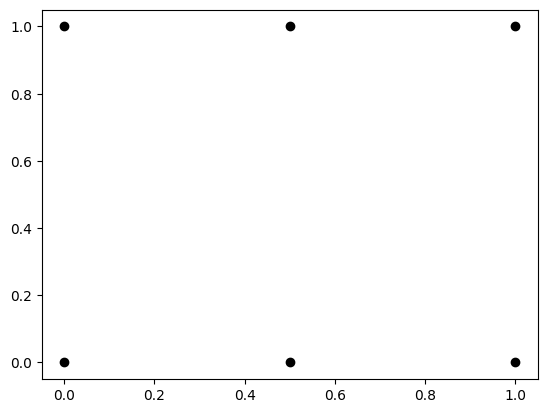

In [22]:
import matplotlib.pyplot as plt
import numpy as np

nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)

plt.plot(xv, yv, marker='o', color='k', linestyle='none')
plt.show()

По существу - каждая точка имеет координаты, которые раскиданы в разных матрицах (по необходимой оси)

In [23]:
print(xv)
print('-' * 30)
print(yv)

[[0.  0.5 1. ]
 [0.  0.5 1. ]]
------------------------------
[[0. 0. 0.]
 [1. 1. 1.]]


Теперь про другие способы создать ndarray. Очевидно, что вам часто потребуется загрузить из каких-то других источников (например, вам дали файл и сказали: делай)

Варианты:

* np.loadtxt(file, delimeter, skiprows=0) - возьми данные из текста, разделяются через delimeter (например, \t - табами), скипни skiprows строк (если там вам не нужны названия, например)

* np.fromstring(s, sep) - загрузи из строки

* np.load(file) - загрузи из файла (работает для всяких штук типа .npy, .npz)

#### Индексация

Тут все достаточно просто - обращение как в питоновских списках

In [14]:
a = np.arange(28)
a = a.reshape(2, -1)
print(a[0][0], a[0, 0]) # обращение к элементу, несколько вариантов
print(a[:1]) # вывести строку
print(a[-1][5:7]) # вывести последнюю строку и часть столбцов
print(a[:, 5:7]) # вывести столбцы

0 0
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]]
[19 20]
[[ 5  6]
 [19 20]]


Попробуем сжать картинку! Допустим, что нам пришла какая-нибудь картинка, которую нужно сжать в 2 раза:

In [ ]:
!wget https://doctorpets.ru/wp-content/uploads/2022/11/1625814965_3-funart-pro-p-popugai-avstralii-zhivotnie-krasivo-foto-4.jpg -O img.jpg

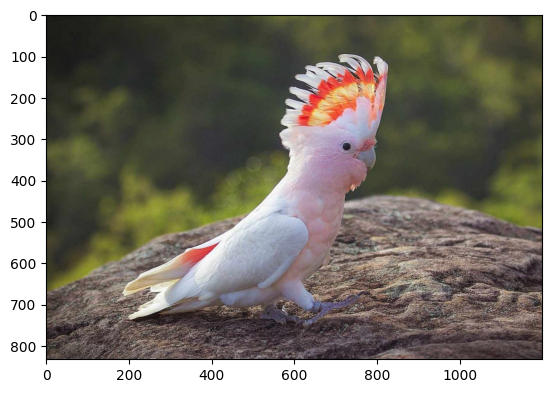

In [9]:
import matplotlib.pyplot as plt

img = plt.imread('img.jpg')
plt.imshow(img)
plt.show()

Как же ее сжать? Хммм, а если попробовать брать только каждый второй пиксель? Давайте попробуем:

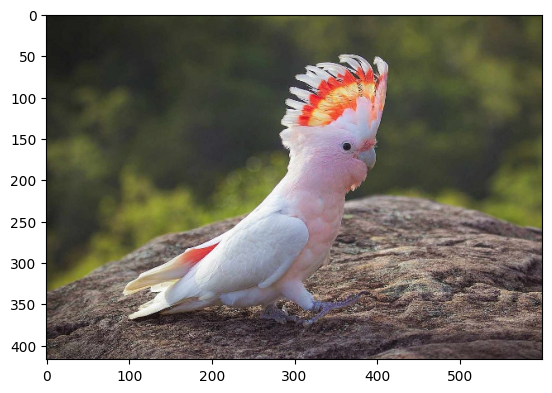

In [10]:
resized_image = img[::2, ::2]
plt.imshow(resized_image)
plt.show()

#### Арифметика

Ну почти как везде (операции с числами считаются как операции со скаляром):

* +, - - сложение-вычитание (поэлементно)

* \* - умножение-деление (поэлементное)

* .T - транспонирование

* A.dot(B) - перемножение матриц

In [16]:
np.random.seed = 1514 ##зададим какой-нибудь seed

a = np.random.rand(3, 3)
b = np.random.rand(3, 3)

print(a)
print(b)
print(a + b)
print(a - b)
print(a * b)
print(a / b)
print(a.dot(b))

[[0.1845019  0.08065321 0.65280948]
 [0.00932005 0.02868003 0.6832995 ]
 [0.00344093 0.40897576 0.59619144]]
[[0.90740554 0.36194893 0.73573347]
 [0.82099725 0.59127333 0.57572788]
 [0.59915298 0.02771419 0.90497014]]
[[1.09190745 0.44260214 1.38854295]
 [0.83031729 0.61995336 1.25902738]
 [0.60259391 0.43668994 1.50116158]]
[[-0.72290364 -0.28129572 -0.08292399]
 [-0.8116772  -0.5625933   0.10757162]
 [-0.59571205  0.38126157 -0.3087787 ]]
[[0.16741805 0.02919234 0.48029378]
 [0.00765173 0.01695774 0.39339458]
 [0.00206164 0.01133443 0.53953545]]
[[2.03329047e-01 2.22830354e-01 8.87290716e-01]
 [1.13521035e-02 4.85055366e-02 1.18684456e+00]
 [5.74298743e-03 1.47569100e+01 6.58796808e-01]]
[[0.62476686 0.13256044 0.77295161]
 [0.44140422 0.03926821 0.64173461]
 [0.69610016 0.25958486 0.7775258 ]]


Умножений, на самом деле, есть несколько:

* a * b - поэлементный (обратите внимание, если a и b типа matrix, то это просто умножение)

* a.dot(b) и np.dot(a, b) - умножение матриц (a на b)

Давайте попробуем сделать следующее: создадим рандомную матрицу размера 3x3 и матрицу из единиц и перемножим их

In [4]:
a = np.random.rand(3, 3)
print(a)
print('-' * 30)
b = np.ones((3, 3))
print(b)
print('-' * 30)

print(a.dot(b)) # получаем суммы по строкам!

[[0.20075565 0.97779474 0.94038597]
 [0.07847716 0.09691257 0.67748693]
 [0.83091132 0.81332761 0.45897896]]
------------------------------
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
------------------------------
[[2.11893636 2.11893636 2.11893636]
 [0.85287665 0.85287665 0.85287665]
 [2.10321789 2.10321789 2.10321789]]


Или допустим, что у нас есть матрица и вектор (допустим, что у нас есть какая-нибудь система и решение, и мы хотим проверить, действительно ли решение СЛАУ верно). Что делать?

$$\begin{cases} 3x - 2y = -6 \\ 5x + y = 3 \end{cases} $$

Мы знаем условно, что $(0, 3)$ - решение. Давайте проверим результат:

In [6]:
a = np.array([[3, -2], [5, 1]])
b = np.array([0, 3])

# a.dot(b)  не сработает, размерности не подойдут

a.dot(b.T) == np.array([-6, 3])

array([ True,  True])

Или допустим вам треуется перевести изображение из rgb в grayscale.

Для того, чтобы перевести изображение в grayscale, надо воспользоваться формулой:

$Y' = 0.299 R + 0.587 G + 0.114 B$

In [11]:
grayscale_img = np.dot(img[:, :,:3], np.array([0.299, 0.587, 0.114]).T)

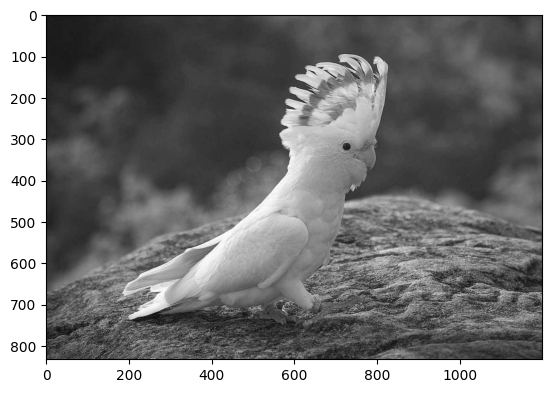

In [12]:
plt.imshow(grayscale_img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

#### Размерности

Что-то можем сделать, кайф. Теперь давайте поговорим про размерности, потому что с этим вы будете сталкиваться чаще всего и вообще не выкупать, а почему у меня ничего не перемножается, какие размерности надо etc (но чаще это будет в pandas)

Базово:

* shape - посмотреть размерности

* reshape - привести к новым размерностям (работает как transpose - меняем strides)

* ravel/flatten - приведи к одномерному массиву

* newaxis - добавь размерность

А теперь в деталях:

In [ ]:
a = np.arange(28)
print(a.shape) # размерность 28, логично
print(a.reshape(2, -1).shape) #приведи к размеру 2 x 14 (-1 значит все остальное)
# если новая размерность не влезает (то есть у вас 28 элементов, а вы хотите размер (3, 2, 5)), то выдаст ошибку
print(a.reshape(3, 2, 5))

(28,)
(2, 14)


ValueError: ignored

In [ ]:
a = a.reshape(2, -1) # сама по себе не меняет размерность
print(a.flatten())
print(a.ravel())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


Получаем одно и то же, но функции разные, в чем прикол?

* flatten возвращает копию (то есть она независима от исходного массива)

* ravel создает только view (то есть ссылку на origin), и если поменять в исходном массиве значение, то и в ravel оно изменится (имейте это ввиду)

In [ ]:
a_f = a.flatten()
a_r = a.ravel()
a[0][0] = 1
print(a_r) # изменилось, ух ты!

[ 1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


А теперь допустим, что нам нужно не уменьшить число размерностей, а наоборот, их добавить

Это можно сделать с помощью newaxis!

In [ ]:
a = np.arange(28)
a = a.reshape(2, -1)
print(a.shape)
a_new = a[:, np.newaxis, :] #указываем newaxis туда, куда нам нужно, : значит возьми все
print(a_new.shape)
a = a.reshape(2, 1, -1) #можно и сделать с помощью reshape
print(a.shape)

(2, 14)
(2, 1, 14)
(2, 1, 14)


#### Соединения и добавления

Представим новую ситуацию: у вас есть два набора данных (допустим, за прошлую неделю и за текущую) и вы хотите их соединить их в единый набор данных

Или же у вас одна половина данных лежит в одной, а другая в другой (скажем, есть карточка товара, в одном месте лежит вся информация про id, название etc, а в другом всякие web-счетчики: сколько посмотрели-покликали и так далее)

Тогда на помощь приходят:

* np.concatenate((arr1, arr2), axis) - соедини две таблицы по выбранному axis (по дефолту 0)

* np.vstack((arr1, arr2)) - соедини две таблицы строчно (то есть друг под другом).То же самое, что и np.concatenate((arr1, arr2), axis=0)

* np.hstack((arr1, arr2)) - соедини две таблицы по колонке (то есть arr1-arr2).То же самое, что и np.concatenate((arr1, arr2), axis=1)

**Как и в перемножении матриц, размерности должны сходиться!**

In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

print(np.vstack((a, b)))
print(np.hstack((a, b)))
print(np.concatenate((a, b), axis=0))
print(np.concatenate((a, b), axis=1))

Допустим у нас есть черно-белый какаду, а мы хотим сделать 4 черно-белых какаду! Давайте делать:

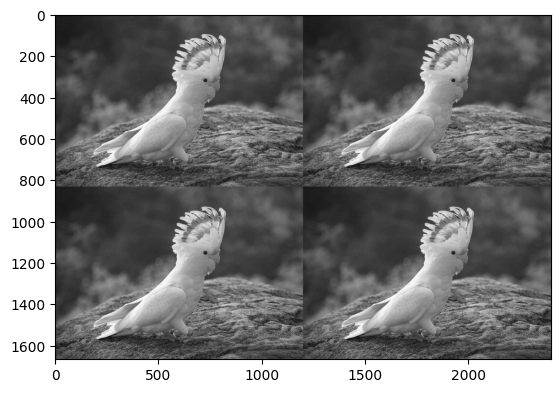

In [17]:
double_parrot = np.concatenate((grayscale_img, grayscale_img), axis = 0)
quarter_parrot = np.concatenate((double_parrot, double_parrot), axis = 1)
plt.imshow(quarter_parrot, cmap = plt.get_cmap(name = 'gray'))
plt.show()

А если хотим добавить?

* np.append(arr_1, arr_2, ..., arr_n, axis) - сделай append (если отдельно задаете axis, то размерности должны быть одинаковыми)

* np.insert(arr, slice, value, axis) - добавь в arr в slice значение value по выбранному axis

* np.resize(arr, (sizes)) - по сути reshape, но если получившийся итог получается больше, то заполняет остальное копией a (аккуратнее с этим, лучше не делать с матрицами)

* arr.resize((sizes)) - reshape, если больше, то заполнит нулями (аккуратно с этим)

In [21]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

print(np.append(a, b, axis=1))
print('-' * 30)
print(np.insert(a, 1, b, axis = 0))
print('-' * 30)
print(np.resize(a, (5, 2)))
print('-' * 30)
a.resize((1, 10))
print(a)
print('-' * 30)
a = np.array([[1, 2], [3, 4]])
print(np.append(a, [1, 2]))

[[1 2 5 6]
 [3 4 7 8]]
------------------------------
[[1 2]
 [5 6]
 [7 8]
 [3 4]]
------------------------------
[[1 2]
 [3 4]
 [1 2]
 [3 4]
 [1 2]]
------------------------------
[[1 2 3 4 0 0 0 0 0 0]]
------------------------------
[1 2 3 4 1 2]


#### Сравнения

Все, помучили наш массив как только можем, давайте теперь его как-то исследовать

Допустим, теперь хотим что-то отфильтровать или посмотреть какие-то конкретные значения

In [ ]:
a = np.arange(30)
print(a[(a > 15) & (a < 27) | (a < 9)]) # как добавить несколько условий сразу через & и | (и/или)
cond = (a > 15) & (a < 27) | (a < 9) # условия можно отдельно записывать, даст массив True-False
print('-' * 30)
print(a[cond])
print(cond)

[ 0  1  2  3  4  5  6  7  8 16 17 18 19 20 21 22 23 24 25 26]
------------------------------
[ 0  1  2  3  4  5  6  7  8 16 17 18 19 20 21 22 23 24 25 26]
[ True  True  True  True  True  True  True  True  True False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True False False False]


In [ ]:
a = np.arange(30).reshape(5, -1)
b = (np.arange(30) - 1).reshape(5, -1)
b[0][0] = 15
a > b #для таких сравнений должны быть одинаковые размерности

array([[False,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [ ]:
print((a > b).all()) # проверить, все ли значения True
print((a > b).any()) # првоерить, есть ли хотя бы одно True
print(a[a > b]) # выведет одномерный массив
print('-' * 30)
print(a[a[:, 0] > [1, 1, 1, 1, 1]]) # можно сравнивать и вот так

False
True
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
------------------------------
[[ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]


Теперь хотим применить условие и что-то сделать со значениями (обрезать или поменять)

Можно по старинке:

In [ ]:
a = np.arange(30).reshape(5, -1)
a[a > 0] = a[a > 0] * 5
a

array([[  0,   5,  10,  15,  20,  25],
       [ 30,  35,  40,  45,  50,  55],
       [ 60,  65,  70,  75,  80,  85],
       [ 90,  95, 100, 105, 110, 115],
       [120, 125, 130, 135, 140, 145]])

Но можно и лучше!

* np.where(cond, act_1, act_2) - измени значения в зависимости от условия (если True, то сделай одно, если False, то другое)

* np.clip(arr, a_min, a_max) - ограничить значения (все, что меньше a_min, станет a_min, все, что больше a_max, станет a_max)

Последнее нужно, например, для обработки картинок (допустим, вам пришли плохие данные, где есть значения не в пределах от 0 до 256)

In [ ]:
a = np.arange(30).reshape(5, -1)
a = np.where(a > 0, a * 5, a)
print(a)
print('-' * 30)
a = np.clip(a, 10, 100)
print(a)

[[  0   5  10  15  20  25]
 [ 30  35  40  45  50  55]
 [ 60  65  70  75  80  85]
 [ 90  95 100 105 110 115]
 [120 125 130 135 140 145]]
------------------------------
[[ 10  10  10  15  20  25]
 [ 30  35  40  45  50  55]
 [ 60  65  70  75  80  85]
 [ 90  95 100 100 100 100]
 [100 100 100 100 100 100]]


#### Прочие полезные вещи

Все, теперь к полному анализу наших данных!

![](https://i.gifer.com/embedded/download/3nHQ.gif)

Что умеем?

*   sum, mean, std, min, max, prod - классика (сумма, среднее, стандратное отклонение, минимум/максимум, произведение)

*   argmin, argmax - найди индекс максимума/минимума (знаете же, что в Python так нельзя, а вот тут пожалуйста)

* nonzero - вывести индексы ненулевых значений

* sort, unique - сортировка, уникальные элементы

* diag, trace - вывести диагональ, след матрицы (работает только для размерности < 3)

* cumsum, cumprod - кумулятивы сумм-произведений

* isnan, isinf, isposinf, isneginf - поиск "плохих" значений

* nan_to_num(x, nan, posinf) - если где-то видим nan или inf, то можем его поменять на значение в nan или posinf



In [ ]:
a = np.array([[[1, 2, 3], [4, 5 ,6], [7, 8, 9]], [[-np.inf, 2, 3], [4, np.nan ,6], [np.nan, 8, np.inf]]])
print(np.argwhere(np.isnan(a)))
print('-' * 30)
print(np.argwhere(np.isinf(a)))
print('-' * 30)
print(np.argwhere(np.isposinf(a)))
print('-' * 30)
print(np.argwhere(np.isneginf(a)))
print('-' * 30)

[[1 1 1]
 [1 2 0]]
------------------------------
[[1 0 0]
 [1 2 2]]
------------------------------
[[1 2 2]]
------------------------------
[[1 0 0]]
------------------------------


In [ ]:
np.nan_to_num(a, copy=False, nan=0, posinf=999, neginf=-999)
#очень часто у функций есть аргумент copy, то есть создавать новую копию или менять в исходном массиве
print(a.sum()) # полная сумма
print('-' * 30)
print(a.sum(axis=0)) # сумма по оси
print('-' * 30)
print(a.std())

68.0
------------------------------
[[-998.    4.    6.]
 [   8.    5.   12.]
 [   7.   16. 1008.]]
------------------------------
333.01310544040416


In [ ]:
print(np.cumsum(a))
print('-' * 30)
print(np.cumprod(a))

[   1.    3.    6.   10.   15.   21.   28.   36.   45. -954. -952. -949.
 -945. -945. -939. -939. -931.   68.]
------------------------------
[ 1.00000000e+00  2.00000000e+00  6.00000000e+00  2.40000000e+01
  1.20000000e+02  7.20000000e+02  5.04000000e+03  4.03200000e+04
  3.62880000e+05 -3.62517120e+08 -7.25034240e+08 -2.17510272e+09
 -8.70041088e+09 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]


Давайте попробуем написать факториал с помощью numpy:

In [ ]:
def factorial_numpy(n):
    # Создаем массив от 1 до n
    numbers = np.arange(1, n + 1)
    # Вычисляем факториалы с использованием NumPy
    factorials = np.prod(numbers)
    return factorials

Или же, если нам требуются все факториалы:

In [ ]:
def all_factorial_numpy(n):
    # Создаем массив от 1 до n
    numbers = np.arange(1, n + 1)
    # Вычисляем факториалы с использованием NumPy
    factorials = np.cumprod(numbers)
    return factorials

#### Линейная алгебра (np.linalg)

Самый сильный инструмент внутри numpy - это модуль numpy.linalg, который позволяет применить кучу методов из линейной алгебры

Из основного:

* numpy.linalg.multi_dot - перемножение нескольких матриц сразу (причем выбирается самый быстрый способ перемножения)

* np.vdot - скалярное произведение (не нужно делать .T  
как минимум)

* numpy.linalg.matrix_power - возвести матрицу в нужную степень

* numpy.linalg.norm - матричная норма

* numpy.linalg.det - определитель матрицы

* numpy.linalg.inv - обратная матрица (если нет, то будет считать через pinv - псевдообратная матрица)

* numpy.linalg.solve(a, b) - решить систему $ax = b$


In [ ]:
import numpy.linalg as lin

A = np.matrix([[1, 2, 3], [4, 5, 11], [7, 8, 10]])
print("Определитель матрицы:", lin.det(A))
print('-' * 30)
print("Обратная матрица:", lin.inv(A))
print('-' * 30)
print("Третья степень матрицы:", lin.matrix_power(A, 3))
print('-' * 30)
b = np.array([1, 2, 3])
print("Решаем систему:", lin.solve(A, b))
print('-' * 30)
c = np.array([1, 2, 3])
print("Скалярное произведение:", np.vdot(c, b))
print('-' * 30)

Определитель матрицы: 27.0
------------------------------
Обратная матрица: [[-1.40740741  0.14814815  0.25925926]
 [ 1.37037037 -0.40740741  0.03703704]
 [-0.11111111  0.22222222 -0.11111111]]
------------------------------
Третья степень матрицы: [[ 559  680 1036]
 [1824 2223 3404]
 [2108 2560 3891]]
------------------------------
Решаем систему: [-0.33333333  0.66666667  0.        ]
------------------------------
Скалярное произведение: 14
------------------------------


#### Выгрузка

Ну все, потрудились, можно и результаты сохранить:

* np.save(name, arr) -  сохранить файл

* np.savetxt(file, arr) - сохранить файл в txt

# Животное дня

![](https://cherepah.ru/wp-content/uploads/f/e/d/fed867b6875cf5a53f93f381c0aba25d.jpeg)

Это ленивец!

![](https://farm4.staticflickr.com/3194/2733424567_d254e0b359_b.jpg)

И это тоже ленивец, но они разные! В чем прикол?

Первый - это трехпалый ленивец, второй - двупалый ленивец, отличаются числом когтей (логично)

Но в чем главный прикол? Так в том, что они вообще не родственники! Они проихошли от совсем разных видов, но эволюция привела их к тому, чтобы быть ленивцами (прям как с крабами).

Ленивцы ленивые, буквально, они спят по 20 часов в сутки, а остальное время едят. За счет того, что они питаются листьями, то у них почти полностью атрофированная мускулатура (на дереве они держатся чисто за счет когтей), плохо видят. Но при этом достаточно неплохо слышат и плавают! (а ходят очень нелепо)

А еще у них 8микамерный желудок (занимает примерно 40% всего тела), что позволяет выжать максимум энергии из листьев. Они живут на деревьях, но при этом не умеют ходить в туалет с воздуха, поэтому раз в неделю им приходится спускаться (вот тогда их обычно и ловят)

Когда конкистадоры прибыли в Латинскую Америку, они пробовали использовать ленивцев в качестве пищи. Но когда они их подстреливали, ленивцы продолжали висеть высоко в деревьях, поэтому на это забили